In [34]:
pip install tensorflow

In [35]:
pip install tensorflow-gpu


  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [39 lines of output]
      Traceback (most recent call last):
        File "c:\Users\Thendral\AppData\Local\Programs\Python\Python37\lib\site-packages\setuptools\_vendor\packaging\requirements.py", line 35, in __init__
          parsed = _parse_requirement(requirement_string)
        File "c:\Users\Thendral\AppData\Local\Programs\Python\Python37\lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 64, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
        File "c:\Users\Thendral\AppData\Local\Programs\Python\Python37\lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 82, in _parse_requirement
          url, specifier, marker = _parse_requirement_details(tokenizer)
        File "c:\Users\Thendral\AppData\Local\Programs\Python\Python37\lib\site-packages\setuptools\_vendor\packaging\_parser.py", l

In [36]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense,Dropout

In [37]:
imdb = tf.keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [38]:
max_length = 200
train_data = pad_sequences(train_data, maxlen=max_length)
test_data = pad_sequences(test_data, maxlen=max_length)

In [39]:
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_length))
model.add(LSTM(units=128,return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 128)          1280000   
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,411,713
Trainable params: 1,411,713
Non-trainable params: 0
_________________________________________________________________


In [40]:
history = model.fit(train_data,train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
313/313 [==============================] - 202s 612ms/step - loss: 0.4524 - accuracy: 0.7789 - val_loss: 0.3260 - val_accuracy: 0.8614
Epoch 2/5
313/313 [==============================] - 188s 602ms/step - loss: 0.2866 - accuracy: 0.8852 - val_loss: 0.3354 - val_accuracy: 0.8554
Epoch 3/5
313/313 [==============================] - 188s 600ms/step - loss: 0.2062 - accuracy: 0.9222 - val_loss: 0.3574 - val_accuracy: 0.8558
Epoch 4/5
313/313 [==============================] - 187s 597ms/step - loss: 0.1501 - accuracy: 0.9456 - val_loss: 0.3762 - val_accuracy: 0.8664
Epoch 5/5
313/313 [==============================] - 189s 604ms/step - loss: 0.1223 - accuracy: 0.9578 - val_loss: 0.4397 - val_accuracy: 0.8398


In [41]:
test_loss, test_acc = model.evaluate(test_data, test_labels)
print(f"Test Accuracy: {test_acc:.4f}")

782/782 [==============================] - 91s 116ms/step - loss: 0.4424 - accuracy: 0.8467
Test Accuracy: 0.8467


In [42]:
import matplotlib.pyplot as plt

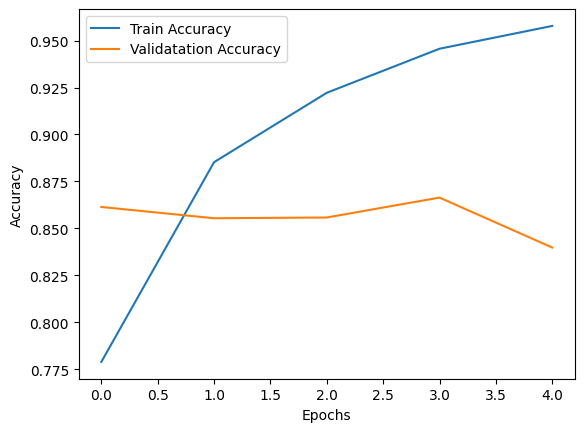

In [43]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validatation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

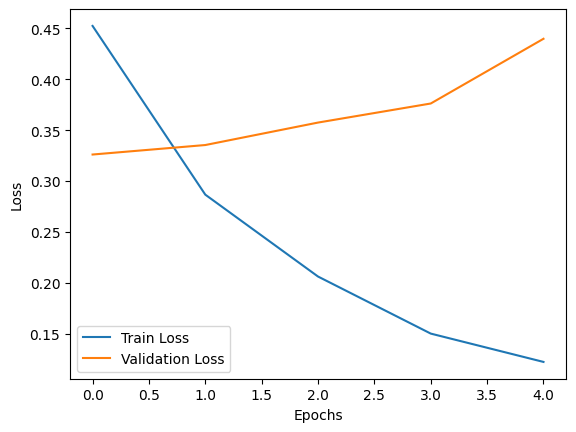

In [44]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [45]:
from  tensorflow.keras.preprocessing.text import Tokenizer

In [58]:
word_index = tf.keras.datasets.imdb.get_word_index()

word_index = {k: (v + 3) for k, v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3

new_review = input("Enter a movie review: ")

new_review = new_review.lower()
new_review_words = new_review.split()
new_review_sequence = [word_index.get(word, 2) for word in new_review_words]
new_review_padded = pad_sequences([new_review_sequence], maxlen=max_length)

prediction = model.predict(new_review_padded)

if prediction > 0.5:
    print("Positive Review")
else:
    print("Negative Review")

1/1 [==============================] - 0s 65ms/step
Positive Review
